In [1]:
# Import dependencies
import numpy as np
import plotly.graph_objects as go
import sys
sys.path.append('../src')
import utils
import height_funcs
from output import output

In [2]:
def visualize_height_by_radial_distance(ring_means, names, colors, file_path, envelope_heights=None,
                                        envelope_hline=None, sym=False, yrange=None, xrange=[-25, 25],
                                        size=(1000,1000), annotation_pos=(0,0), subtitle=""):
    """ring means is an array of 2d arrays"""
    fig = go.Figure()
    max_r = len(ring_means[0])
    if sym:
        x = [i for i in range(-max_r + 1, max_r)]
        y = [np.concatenate((np.flip(ring_mean)[:-1], ring_mean)) for ring_mean in ring_means]
        if envelope_heights is not None:
            envelope_heights = np.concatenate((np.flip(envelope_heights)[:-1], envelope_heights))
    else:
        x = [i for i in range(max_r)]
        y = ring_means
    for i in range(len(names)):
        fig.add_trace(go.Scatter(x=x, y=y[i], mode='lines', opacity=1, name=names[i],
                                 line=dict(width=6, dash='dash' if i == 6 else None),
                                 marker=dict(size=8, color=colors[i])))
    fig.update_layout(xaxis_title="Distance from center (nm)",
                      yaxis_title="Height (nm)",
                      font=dict(size=16),
                      template="plotly_white",
                      xaxis=dict(dtick=2.5),
                      yaxis=dict(dtick=2.5))
    
    
    # Add title and subtitle
    fig.update_layout(title=dict(
            text="Mean height over distance",
            subtitle=dict(
                text=subtitle,
                font=dict(color="gray", size=13),
            ),
        )
    )
    
    # Add nuclear envelope gray thing
    if envelope_heights is not None:
        fig.add_trace(go.Scatter(x=list(range(-25, 26)), y=envelope_heights, mode='lines', line=dict(width=12, color="#2e2f30"), name="Nuclear Envelope", fill='tozeroy', fillcolor='#2e2f30'))
    if envelope_hline is not None:
        fig.add_hline(y=envelope_hline, line_dash="dash", name="Nuclear Envelope")
    
    # Add grid
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#9e9d99', zerolinecolor='#9e9d99')

    # Add Nuclear Envelope annotation
    fig.add_annotation(x=annotation_pos[0], y=annotation_pos[1], text="Nuclear Envelope", showarrow=False, font=dict(size=12))
    
    # Scale 1:1 x and y axes
    fig.update_yaxes(scaleanchor="x")
    
    if yrange:
        fig.update_layout(yaxis_range=yrange)
        fig.update_layout(xaxis_range=xrange)
    

    
    # add border around plot
    fig.update_xaxes(mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='black')
    fig.update_yaxes(mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='black')

    fig.show(renderer="png", width = size[0], height = size[1])
    

In [1]:
p1 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/mini_0uM_100ns_40x40/1.pickle"
p2 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/mini_200uM_100ns_40x40/10.pickle"
paths = [p1, p2]
non_rasterized_maps = []
ring_means = []
args = output.load_pickle(paths[0])["args"]
args2 = args
args2["tip_radius_px"] = 0
for path in paths:
    non_rasterized_maps.append(output.load_pickle(path)["non_rasterized_maps"])
for i in range(len(paths)):
    ring_means.append(utils.get_ring_means_array(np.mean(np.dstack(non_rasterized_maps[i]), axis=2),
                                                    non_rasterized_maps[i][0].shape[0] / 2,
                                                    non_rasterized_maps[i][0].shape[1] / 2) - 40)
envelope_heights = np.array([height_funcs.get_slab_top_z(x, 20, (20, 20, 40), args2) - 40 for x in range(20, 20 + 26)])


NameError: name 'output' is not defined

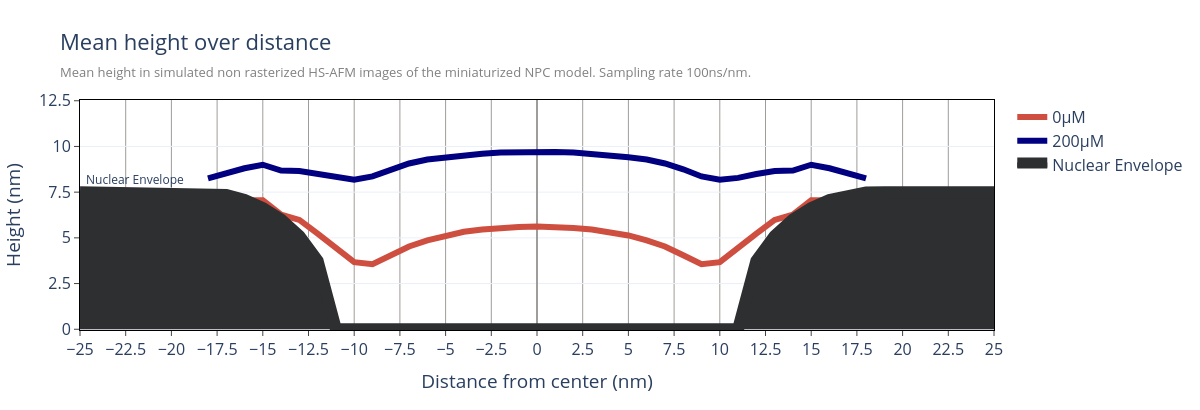

In [ ]:
visualize_height_by_radial_distance(ring_means, 
                                    ["0μM", "200μM"],
                                    ["#ce4e40", "#000080"],
                                    "",
                                    envelope_heights=envelope_heights,
                                    sym=True,
                                    yrange=[0, 12.5],
                                    size=(1200, 410),
                                    annotation_pos=(-22, 8.2),
                                    subtitle="Mean height in simulated non rasterized HS-AFM images of the miniaturized NPC model. Sampling rate 100ns/nm.")

In [ ]:
# todo: same for full pore. 
p1 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/full_0uM_1ns/3.pickle"
p2 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/full_50uM_1ns/3.pickle"
paths = [p1, p2]
non_rasterized_maps = []
ring_means = []
args = output.load_pickle(paths[0])["args"]
args2 = args
args2["tip_radius_px"] = 0
for path in paths:
    non_rasterized_maps.append(output.load_pickle(path)["non_rasterized_maps"])
for i in range(len(paths)):
    ring_means.append(utils.get_ring_means_array(np.mean(np.dstack(non_rasterized_maps[i]), axis=2),
                                                                   non_rasterized_maps[i][0].shape[0] / 2,
                                                                   non_rasterized_maps[i][0].shape[1] / 2) - 40)
envelope_heights = np.array([height_funcs.get_slab_top_z(x, 40, (40, 40, 40), args2) - 40 for x in range(40, 80)])

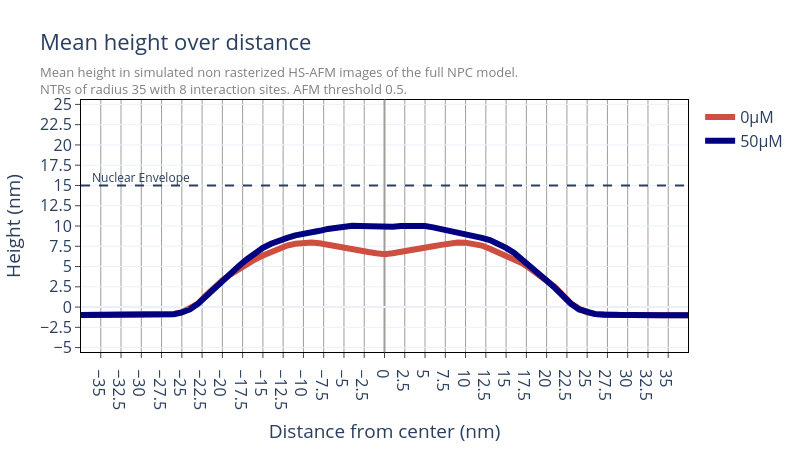

In [ ]:
visualize_height_by_radial_distance(ring_means,
                                    ["0μM", "50μM"],
                                    ["#ce4e40", "#000080"],
                                    "",
                                    sym=True,
                                    yrange=[0, 20],
                                    xrange=[-35, 35],
                                    envelope_hline=15,
                                    size=(800, 450),
                                    annotation_pos=(-30, 16),
                                    subtitle="Mean height in simulated non rasterized HS-AFM images of the full NPC model. <br>NTRs of radius 35 with 8 interaction sites. AFM threshold 0.5. Sampling rate 1ns."
                                    )

In [3]:
p1 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/full_0uM_1ns/4.pickle"
p2 = "/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/dataset/afm/new/full_50uM_1ns/4.pickle"
paths = [p1, p2]
non_rasterized_maps = []
args = output.load_pickle(paths[0])["args"]
args2 = args
args2["tip_radius_px"] = 0
for path in paths:
    non_rasterized_maps.append(output.load_pickle(path)["non_rasterized_maps"])


In [4]:
ring_means_t = []
for t in range(4):
    ring_means_t.append([[],[]])
    for i in range(len(paths)):
        ring_means_t[t][i] = utils.get_ring_means_array(np.mean(np.dstack(non_rasterized_maps[i][t*10000:(t+1)*10000]), axis=2),
                                                                    non_rasterized_maps[i][0].shape[0] / 2,
                                                                    non_rasterized_maps[i][0].shape[1] / 2) - 40
        # envelope_heights = np.array([height_funcs.get_slab_top_z(x, 40, (40, 40, 40), args2) - 40 for x in range(40, 80)])

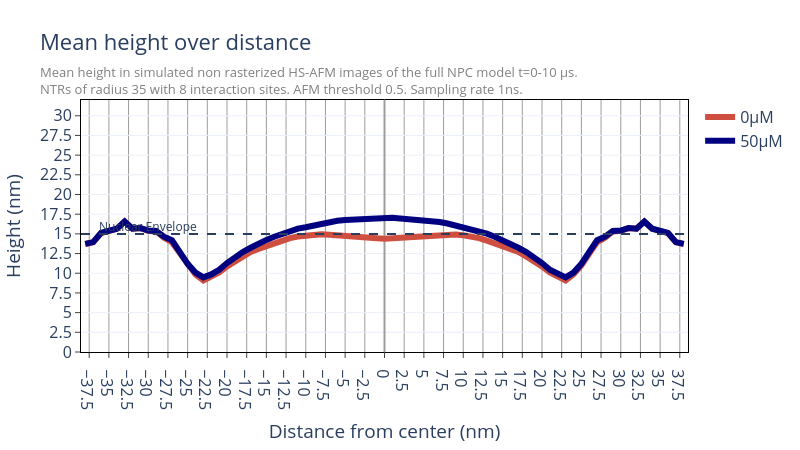

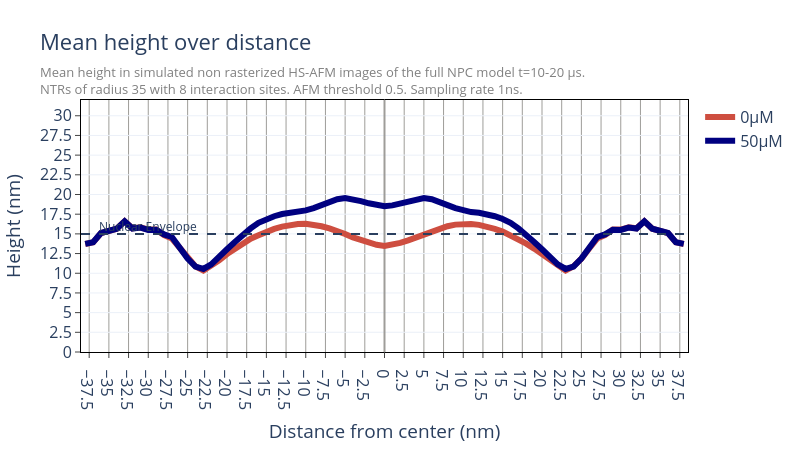

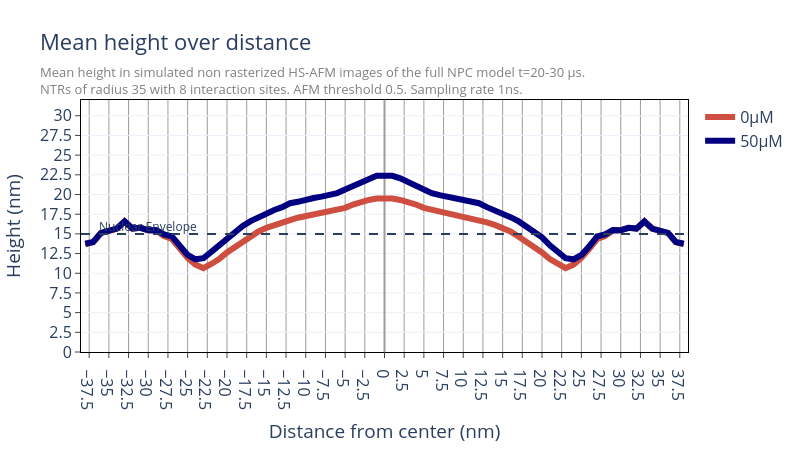

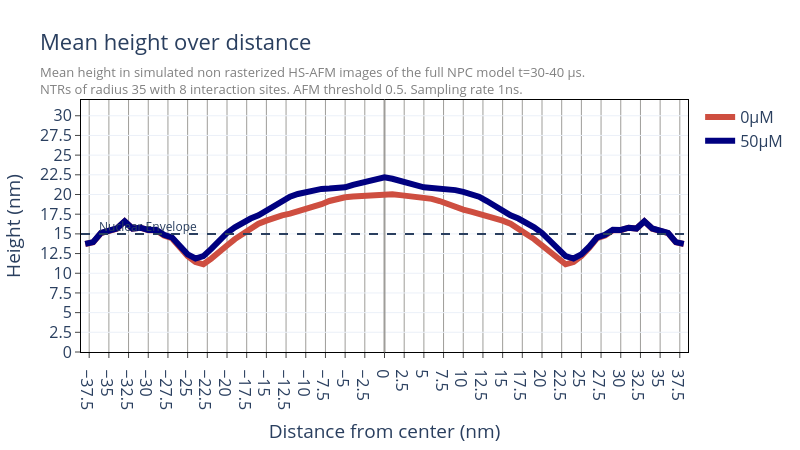

In [5]:
for t in range(4):
    visualize_height_by_radial_distance(ring_means_t[t],
                                    ["0μM", "50μM"],
                                    ["#ce4e40", "#000080"],
                                    "",
                                    sym=True,
                                    yrange=[0, 32],
                                    xrange=[-35, 35],
                                    envelope_hline=15,
                                    size=(800, 450),
                                    annotation_pos=(-30, 16),
                                    subtitle=f"Mean height in simulated non rasterized HS-AFM images of the full NPC model t={t*10}-{(t+1)*10} µs. <br>NTRs of radius 35 with 8 interaction sites. AFM threshold 0.5. Sampling rate 1ns."
                                    )